## DATA UNDERSTANDING

In [1]:
pip install pandas numpy matplotlib

In [5]:
import pandas as pd

# Memuat data PO dan PA
data_po = pd.read_csv('C:\\Users\\ASUS\\Downloads\\GLC25_P0_metadata_train.csv')
data_pa = pd.read_csv('C:\\Users\\ASUS\\Downloads\\GLC25_PA_metadata_train.csv')

# Menampilkan 5 baris pertama dari masing-masing dataset
print("Data PO:")
print(data_po.head())

print("\nData PA:")
print(data_pa.head())

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\ASUS\\Downloads\\GLC25_PA_metadata_train.csv'

In [3]:
# Menampilkan informasi tentang data (tipe data, jumlah nilai non-null)
print("\nData PO Info:")
print(data_po.info())

print("\nData PA Info:")
print(data_pa.info())

# Menampilkan statistik deskriptif untuk data numerik
print("\nDeskripsi Statistik PO:")
print(data_po.describe())

print("\nDeskripsi Statistik PA:")
print(data_pa.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5079797 entries, 0 to 5079796
Data columns (total 12 columns):
 #   Column             Dtype  
---  ------             -----  
 0   publisher          object 
 1   year               int64  
 2   month              float64
 3   day                float64
 4   lat                float64
 5   lon                float64
 6   geoUncertaintyInM  float64
 7   taxonRank          object 
 8   date               object 
 9   dayOfYear          int64  
 10  speciesId          float64
 11  surveyId           int64  
dtypes: float64(6), int64(3), object(3)
memory usage: 465.1+ MB


publisher               0
year                    0
month                 484
day                  1819
lat                     0
lon                     0
geoUncertaintyInM       0
taxonRank               0
date                    0
dayOfYear               0
speciesId               0
surveyId                0
dtype: int64

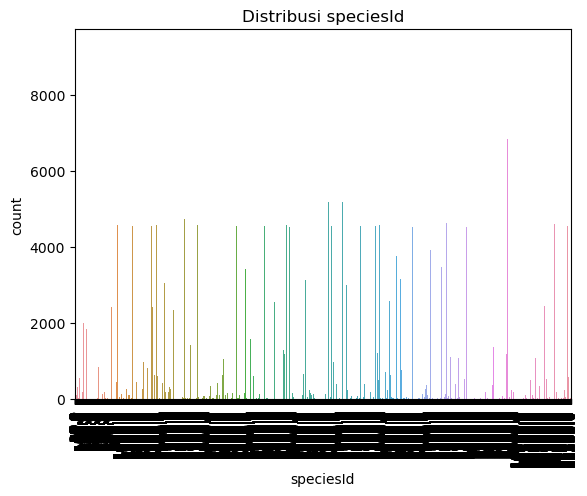

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='speciesId')
plt.xticks(rotation=90)
plt.title('Distribusi speciesId')
plt.show()

In [5]:
# Contoh korelasi numerik
df.corr(numeric_only=True)

,year,month,day,lat,lon,geoUncertaintyInM,dayOfYear,speciesId,surveyId
year,1.000000,-0.071849,-0.007169,-0.258431,-0.072505,0.041574,-0.071571,-0.010285,0.001500
month,-0.071849,1.000000,-0.101153,0.124361,0.058758,-0.073033,0.990004,0.005331,0.000890
day,-0.007169,-0.101153,1.000000,-0.002907,-0.005587,-0.006864,0.039804,0.000483,0.001194
lat,-0.258431,0.124361,-0.002907,1.000000,0.357664,-0.081901,0.124044,-0.009224,-0.000448
lon,-0.072505,0.058758,-0.005587,0.357664,1.000000,-0.020214,0.057862,-0.002113,0.000436
geoUncertaintyInM,0.041574,-0.073033,-0.006864,-0.081901,-0.020214,1.000000,-0.074008,-0.009406,-0.001855
dayOfYear,-0.071571,0.990004,0.039804,0.124044,0.057862,-0.074008,1.000000,0.005617,0.001069
speciesId,-0.010285,0.005331,0.000483,-0.009224,-0.002113,-0.009406,0.005617,1.000000,0.001105
surveyId,0.001500,0.000890,0.001194,-0.000448,0.000436,-0.001855,0.001069,0.001105,1.000000


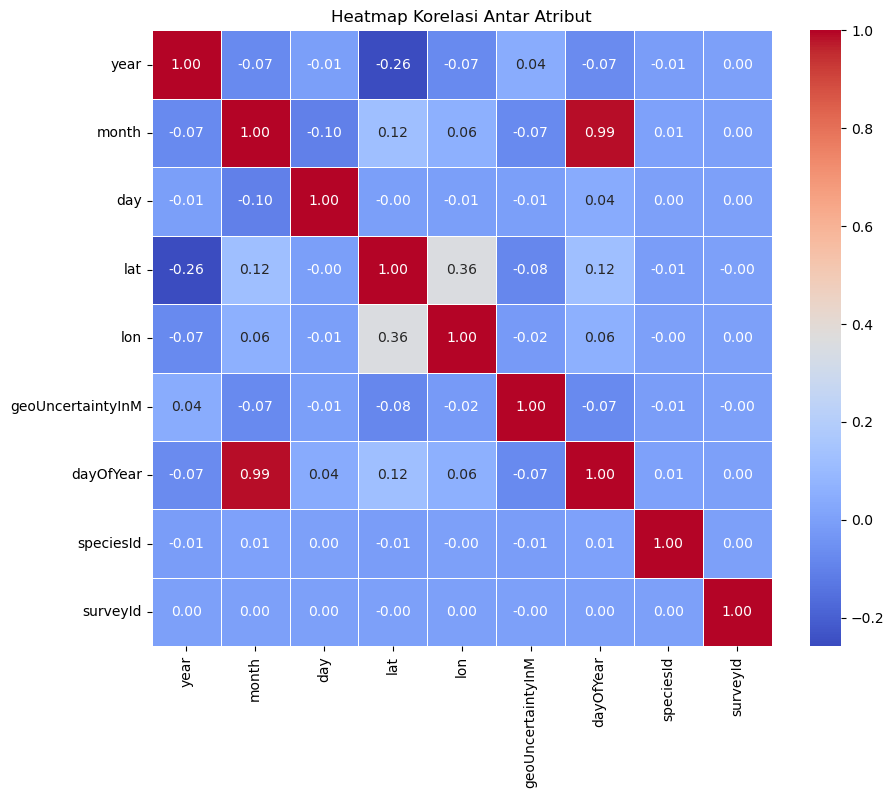

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Hitung korelasi antar fitur numerik
correlation_matrix = df.corr(numeric_only=True)

# Atur ukuran plot
plt.figure(figsize=(10, 8))

# Buat heatmap dengan anotasi nilai korelasi
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Judul plot
plt.title("Heatmap Korelasi Antar Atribut")
plt.show()

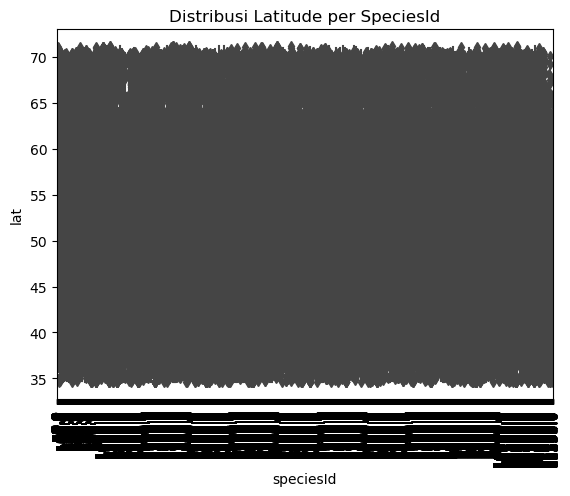

In [7]:
# Visualisasi Distribusi
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='speciesId', y='lat', data=df)
plt.title('Distribusi Latitude per SpeciesId')
plt.xticks(rotation=90)
plt.show()

# Data Preparation

In [8]:
# Daftar fitur relevan berdasarkan analisis sebelumnya
fitur_relevan = ['lat', 'lon', 'year', 'month', 'dayOfYear', 'geoUncertaintyInM']

# Memilih hanya kolom-kolom yang relevan
X = df[fitur_relevan]
y = df['speciesId']  # Label untuk prediksi

KeyError: "['day_of_week'] not in index"

In [ ]:
# Cek missing values
print("Missing values sebelum dibersihkan:")
print(df.isnull().sum())

# Drop baris yang mengandung missing values
df = df.dropna()

# Drop duplikat
df = df.drop_duplicates()

# Validasi latitude dan longitude
df = df[(df['lat'].between(-90, 90)) & (df['lon'].between(-180, 180))]

# Konversi kolom 'date' jika ada dan hapus tanggal yang tidak valid
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'], errors='coerce')
    df = df.dropna(subset=['date'])  # Hapus tanggal tidak valid

In [ ]:
print("Missing values setelah dibersihkan:")
print(df.isnull().sum())

In [ ]:
# Tambahkan fitur hari dalam seminggu jika ada kolom 'date'
if 'date' in df.columns:
    df['day_of_week'] = df['date'].dt.dayofweek

# Cek jika fitur dayOfYear tidak tersedia, maka buat
if 'dayOfYear' not in df.columns:
    df['dayOfYear'] = pd.to_datetime(df[['year', 'month', 'day']], errors='coerce').dt.dayofyear

# Buat fitur baru (contoh: kombinasi lokasi sebagai string)
df['location'] = df['lat'].round(2).astype(str) + "_" + df['lon'].round(2).astype(str)

In [ ]:
# Label yang akan diprediksi adalah speciesId
y = df['speciesId']  # Target label

In [ ]:
# Fitur yang digunakan untuk prediksi
X = df[fitur_relevan]  # Data input

# Pastikan label tetap berada di y
y = df['speciesId']  # Target output